<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Project_003_dacon_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

In [ ]:
result_r6 = pd.read_csv('/content/drive/MyDrive/Project_003/model_Robust_covariance_6_submit_3.csv')
result_r4 = pd.read_csv('/content/drive/MyDrive/Project_003/model_Robust_covariance_4_submit_8.csv')
result_if = pd.read_csv('/content/drive/MyDrive/Project_003/model_Isolation_Forest_4_submit_8.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Project_003/test.csv')
val = pd.read_csv('/content/drive/MyDrive/Project_003/val.csv')

In [ ]:
columns = []

for i in range(1, 30 + 1) :
  columns.append('V{}'.format(i))

print(columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']


In [ ]:
val_abnor = val[val['Class'] == 1][columns]
abnor_vector = val_abnor.mean().to_numpy()

def cos_sim(a, b) :
  return dot(a, b) / (norm(a) * norm(b))

def cosfeature(data) :
  datacs = []
  for i in data[columns].to_numpy() :
    datacs.append(cos_sim(abnor_vector, i))
  data['V31'] = datacs

cosfeature(val)
cosfeature(test)

In [ ]:
color_r6 = []
color_r4 = []
color_if = []

for i in range(len(test)) :
  if result_r6['Class'][i] == 1 :
    color_r6.append('r')
  else :
    color_r6.append('b')

for i in range(len(test)) :
  if result_r4['Class'][i] == 1 :
    color_r4.append('r')
  else :
    color_r4.append('b')

for i in range(len(test)) :
  if result_if['Class'][i] == 1 :
    color_if.append('r')
  else :
    color_if.append('b')

print(color_r6.count('r'))
print(color_r4.count('r'))
print(color_if.count('r'))

297
294
295


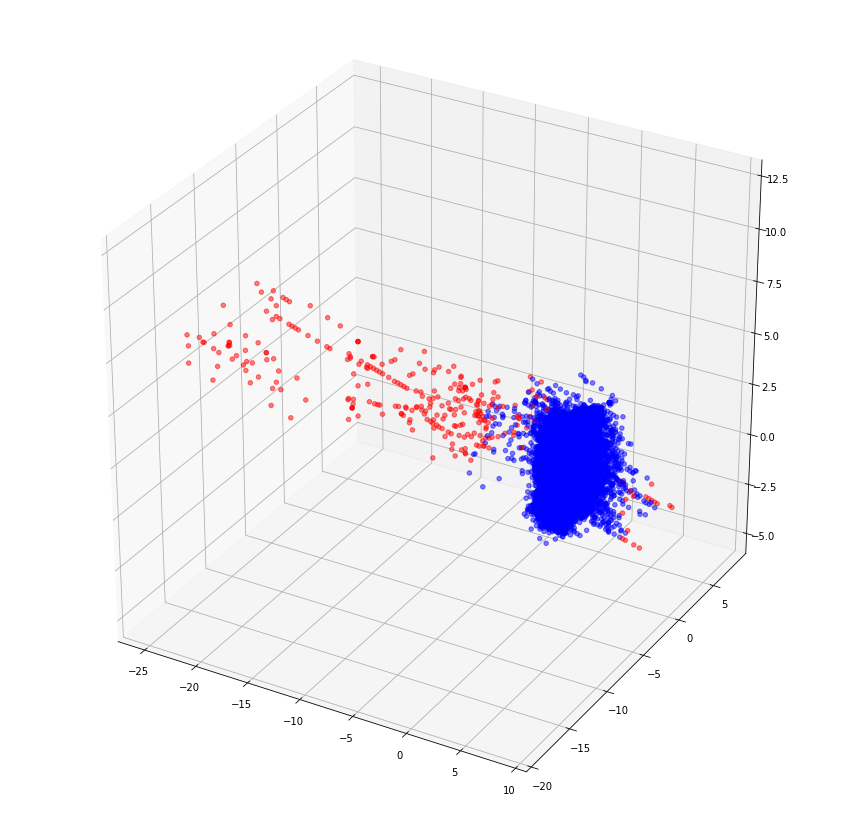

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V17'], test['V12'], test['V11'], alpha = 0.5, c = color_r6)
plt.show()

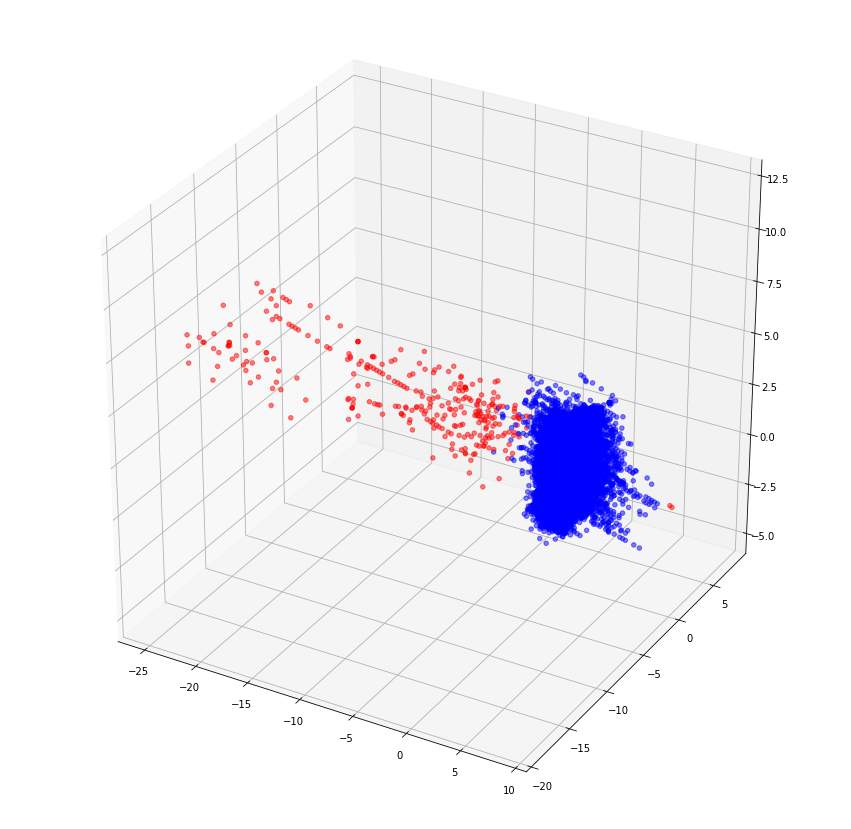

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V17'], test['V12'], test['V11'], alpha = 0.5, c = color_r4)
plt.show()

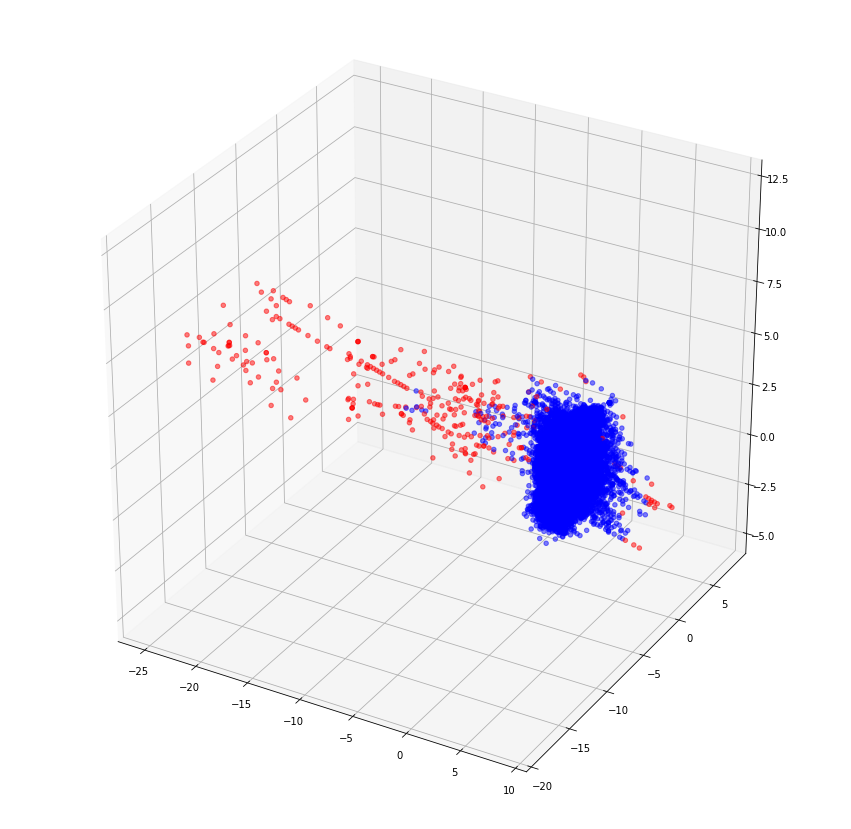

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V17'], test['V12'], test['V11'], alpha = 0.5, c = color_if)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [ ]:
test_select = test[['V11', 'V12', 'V17', 'V31']]
# test_scaled = pd.DataFrame(ss.fit_transform(test_select))
# test_scaled.columns = ['V11', 'V12', 'V17', 'V31']
test_arr = test_select.to_numpy()
print(test_arr[ : 5])

[[-0.55159953 -0.61780086  0.20797124 -0.05244574]
 [ 1.61272666  1.06523531 -0.11480466 -0.05542973]
 [-0.82284288  0.53819555 -0.23703324 -0.07273716]
 [-1.41690724 -0.15382583  0.00282051 -0.09234647]
 [-0.25911556 -0.32614323 -0.80997893 -0.08431157]]


In [ ]:
target_arr = result_r4['Class'].to_numpy()
print(target_arr[ : 5])

[0 0 0 0 0]


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
train = test_arr
target = target_arr

svm.fit(train, target)

SVC(kernel='linear')

In [ ]:
predict = svm.predict(train)
predict[ : 5]

array([0, 0, 0, 0, 0])

In [ ]:
color_svm = []

for i in range(len(predict)) :
  if predict[i] == 1 :
    color_svm.append('r')
  else :
    color_svm.append('b')

color_svm.count('r')

314

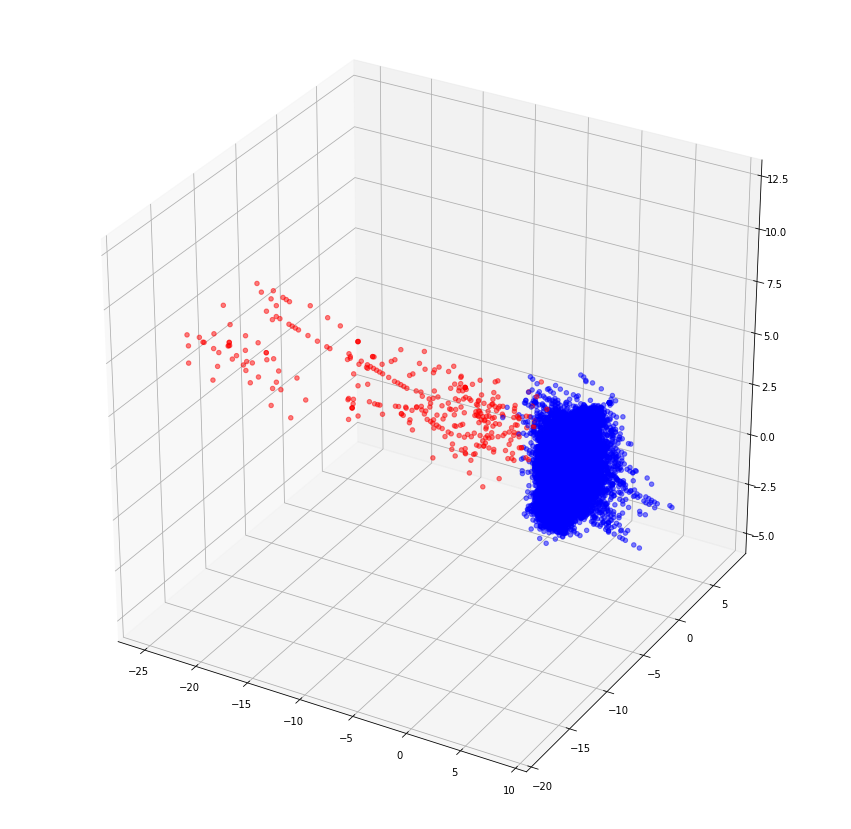

In [ ]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V17'], test['V12'], test['V11'], alpha = 0.5, c = color_svm)
plt.show()

In [ ]:
val_ans = val['Class'].to_numpy()
val_ans[ : 5]

array([0, 0, 0, 0, 0])

In [ ]:
val_select = val[['V11', 'V12', 'V17', 'V31']]
# val_scaled = pd.DataFrame(ss.fit_transform(val_select))
# val_scaled.columns = ['V11', 'V12', 'V17', 'V31']
val_arr = val_select.to_numpy()
val_arr[ : 5]

array([[ 1.01761447,  0.83638957, -0.54097992, -0.05566259],
       [ 1.69032992,  0.40677358,  0.40248438, -0.01252893],
       [-0.44893708, -0.66086332, -0.28787845,  0.00470501],
       [ 1.94454487,  1.38515995,  1.00286902, -0.0708108 ],
       [ 2.57250018,  0.06685074, -1.94230314, -0.09104688]])

In [ ]:
val_pre = svm.predict(val_arr)
val_pre[ : 5]

array([0, 0, 0, 0, 0])

In [ ]:
score_board = []

for i in range(len(val)) :
  if (val_ans[i] == 1) and (val_pre[i] == 1) :
    score_board.append('TP')
  elif (val_ans[i] == 0) and (val_pre[i] == 1) :
    score_board.append('FP')
  elif (val_ans[i] == 1) and (val_pre[i] == 0) :
    score_board.append('FN')
  else :
    score_board.append('TN')

len(score_board)

28462

In [ ]:
precision = score_board.count('TP') / (score_board.count('TP') + score_board.count('FP'))
recall = score_board.count('TP') / (score_board.count('TP') + score_board.count('FN'))

print('Precision : {:.5f}'.format(precision))
print('Recall : {:.5f}'.format(recall))

Precision : 0.83333
Recall : 0.83333


In [ ]:
f1 = 2 * ((precision * recall) / (precision + recall))
print('f1_score : {:.5f}'.format(f1))

f1_score : 0.83333


In [ ]:
pre_df = pd.DataFrame(predict)
answer = pd.concat([test['ID'], pre_df], axis = 1)
answer.columns = ['ID', 'Class']
answer.set_index('ID', inplace = True)
answer.head()

,Class
ID,
AAAA0x1,0
AAAA0x2,0
AAAA0x5,0
AAAA0x7,0
AAAA0xc,0


In [ ]:
answer[answer['Class'] == 1].count()

Class    314
dtype: int64

In [ ]:
answer.shape

(142503, 1)

In [ ]:
answer.to_csv('Robust4_to_svm_classification.csv')